## train 데이타와 일반대화 데이타를 merge하여 하나의 파일로 만든다.

0. 파일 
  - original_train_data : train.csv
  - 일반대화 데이타 : conversation_normal.csv
1. train 데이타 내용 확인
2. 중복 데이타와 null 데이타 확인
3. original train과 일반 대화 데이타 merge
4. train 데이타 통계 분석 시각화 
5. merged train 데이타 csv 파일 저장

### 1. train 데이타 내용 확인

In [43]:
import os
import pandas as pd
import tensorflow
import numpy as np

In [44]:
orig_train_path ="../data/raw_csv/train.csv"
orig_train = pd.read_csv(orig_train_path)
orig_train.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [45]:
class_counts = orig_train['class'].value_counts()

print(class_counts)

orig_train.shape

기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: class, dtype: int64


(3950, 3)

In [46]:
orig_train[orig_train['class']=='협박 대화'][:3]

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
12,12,협박 대화,네네 무슨 일 때문에 전화주셨나요?\n우리 애가 지우개 하나 훔친거 가지고 애들 앞...


In [47]:
orig_train[orig_train['class']=='갈취 대화'][:3]

,idx,class,conversation
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
9,9,갈취 대화,자네 세금계산서 보내준 거 메일이랑 수치가 다르던데?\n그게.\n얼마나 해먹었어? ...


In [48]:
orig_train[orig_train['class']=='직장 내 괴롭힘 대화'][:3]

,idx,class,conversation
5,5,직장 내 괴롭힘 대화,나 이틀뒤에 가나다 음식점 예약좀 해줘. 저녁7시로.\n가나다 음식점이요.?\n응....
11,11,직장 내 괴롭힘 대화,이대리 오늘 도대체 뭘한거야?\n창고정리도 하고 바닥도 청소했습니다\n이게 한거니?...
14,14,직장 내 괴롭힘 대화,김사원\n대리님 왜 그러세요?\n이거 오늘까지 제출해야 하는데 좀 해줄래?\n네? ...


In [49]:
orig_train[orig_train['class']=='기타 괴롭힘 대화'][:3]

,idx,class,conversation
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
6,6,기타 괴롭힘 대화,35번 손님 아이스커피 두잔나왔습니다\n아이스커피? \n네 맛있게드세요\n저기요 아...
7,7,기타 괴롭힘 대화,경비아저씨 내차에 경고장 붙였어요?\n내가 여기 몇년째 사는데 아직도 내차인줄 모르...


In [50]:
# 일반 대화
normal_data_path ="../data/raw_csv/conversation_normal.csv"
normal_data = pd.read_csv(normal_data_path)
normal_data.head()

,idx,class,conversation
0,4001,일반 대화,"집에서 자주 만드는 음식 있어?\n응, 김치찌개 자주 만들어.\n오, 김치찌개! 어..."
1,4002,일반 대화,"너는 어떤 장르 좋아해?\n나는 록 음악을 좋아해.\n오, 록! 그럼 Queen 좋..."
2,4003,일반 대화,"오늘 점심 뭐 먹을까요?\n저는 김밥 먹고 싶은데, 다른 사람들은 어떻게 생각해요?..."
3,4004,일반 대화,과제 다 했어?\n아직이야. 너무 많아.\n나도 겨우 끝냈어.\n우리 같이 도서관 갈래?
4,4005,일반 대화,"이 장난감은 여러 가지 색상 중에서 선택할 수 있나요?\n네, 다양한 색상이 있어서..."


In [51]:
print(len(normal_data))

932


### 2. 중복 데이타와 null 데이타 확인

In [52]:
print('orig_train의 전체 샘플수 :', (len(orig_train)))
print('orig_train의 conversation 열에서 중복을 배제한 유일한 샘플의 수 :', orig_train['conversation'].nunique())
print('orig_train의 중복제거 샘플수 :',(len(orig_train) - orig_train['conversation'].nunique()) )
print(orig_train.isnull().sum())

orig_train의 전체 샘플수 : 3950
orig_train의 conversation 열에서 중복을 배제한 유일한 샘플의 수 : 3846
orig_train의 중복제거 샘플수 : 104
idx             0
class           0
conversation    0
dtype: int64


In [54]:
orig_duplicates  = orig_train[orig_train.duplicated(subset = ['conversation', 'class'], keep=False)]
print(orig_duplicates)

       idx      class                                       conversation
29      29  기타 괴롭힘 대화  병신이 아이스크림 먹게 돼 있냐?\n난 먹으면 안 돼? 그만 좀 해.\n당연히 안 ...
31      31  기타 괴롭힘 대화  니가 나 따라한다는 애구나?\n 내가? 나 너 안따라해.\n머라는거야. 여기 사진 ...
34      34  기타 괴롭힘 대화  야 손병신.\n하.\n한숨 쉬었어? 야 손병신.\n그렇게 부르지마.\n뭐? 병신한테...
94      94  기타 괴롭힘 대화  야 니 왤캐 못생겼냐?\n뭐라그랬냐?\n으 나 보고 말하지마 니 얼굴보면 토나올거 ...
114    114  기타 괴롭힘 대화  너 일로 따라와봐.\n왜 그러는데.?\n그냥 닥치고 따라오라면 따라와 진짜\n어어....
...    ...        ...                                                ...
3797  3797  기타 괴롭힘 대화  너 이번 방학 때 쌍꺼풀 수술 하고왔지?\n아닌데?\n아니긴 뭐가 아니야. 눈이 이...
3798  3798  기타 괴롭힘 대화  안녕하세요 지금 먹방 촬영중인데 촬영가능할까요?\n안돼요\n한번만 안될까요?\n안돼...
3855  3855  기타 괴롭힘 대화  그 소문 진짜야? 너가 다른 애들 뒷담화하고 다녔다며?\n응? 나 그런 적 없는데?...
3874  3874  기타 괴롭힘 대화  야 니 왤캐 못생겼냐?\n뭐라그랬냐?\n으 나 보고 말하지마 니 얼굴보면 토나올거 ...
3928  3928  기타 괴롭힘 대화  새파랗게 젊은게 어디 여길 앉아있어\n저 임산부에요\n사지 멀쩡한게! 임신이 벼슬이...

[208 rows x 3 columns]


In [56]:
# 그룹화해서 몇 번 중복됐는지 보기
grouped = orig_duplicates.groupby(['conversation', 'class']).size().reset_index(name='count')

print(grouped)

                                          conversation        class  count
0    100만원만 어떻게 해주라.\n저 번에 빌린 돈도 안 갚았잖아. 그 동안 빌린 돈이...        갈취 대화      2
1    5년전 너가 나한테 상처줬던 말들 다 사과해\n내가 너한테 뭘 어쨌는데?\n가해자는...        협박 대화      2
2    거기. 어 그래 너.\n부르셨습니까?\n이거 서류들 정리해서 오늘까지 끝내 놔.\n...  직장 내 괴롭힘 대화      2
3    공책 돌려받길 원하면 빨리 뛰어봐. 이 굼벵아.\n빨리 내놔.\n빨릐 내놔아. 빨리...    기타 괴롭힘 대화      2
4    과장님. 저 이번에 휴가 좀 갔다와도 되겠습니까.?\n휴가? 왜??\n좀 쉬다가 오...  직장 내 괴롭힘 대화      2
..                                                 ...          ...    ...
99   지현씨 나 소개팅 좀 시켜줘봐\n네? 저 주변에 아는 사람이 없어서요\n아 상사라 ...  직장 내 괴롭힘 대화      2
100  진용아 내 내 가방 돌려줘\n아하하 진용아? 가방 돌려줄까?\n노 놀리지마\n노 놀...    기타 괴롭힘 대화      2
101  친구야 안녕\n네.? 누구\n내가 오늘 남자친구랑 22라 돈 좀\n저 돈 없는데요\...        갈취 대화      2
102  친구야 지방대 다닐만하냐?\n 응. 편하고 좋아\n 너네학교 애들은 공부안하고 술만...    기타 괴롭힘 대화      2
103  푸핫 야 너 배좀 봐 밥이 들어가니?\n아 왜그래요\n아니 너만 보면 진짜 한심해서...    기타 괴롭힘 대화      2

[104 rows x 3 columns]


In [55]:
# 그룹별로 출력
for key, group in orig_duplicates.groupby(['conversation', 'class']):
    print(f"\nGroup: {key} (Count: {len(group)})")
    print(group)


Group: ('100만원만 어떻게 해주라.\n저 번에 빌린 돈도 안 갚았잖아. 그 동안 빌린 돈이 얼만지 알아?\n자기도 알잖아. 나 이번에 못 막으면 신용불량 되는 거.\n그렇다고 매번 나한테 손 빌리면 어떡해?\n코로나 때문에 다 어긋나서 그러는데 어떡해? 그럼 죽어? 이러지 말고 한 번만 더 도와주라.\n안 돼. 이번엔 자기가 알아서 해결해.\n너 진짜 이럴래?\n헤어질 각오로 말하는 거야.\n헤어지면 감당은 할 수 있고?\n내가 뭘 감당해야 되는데?\n내 핸드폰에 니 영상만 몇 백개야. 니가 돈 안 해주면 그거 팔아서 돈 마련할거야. 그게 싫으면 잔말말고 돈 해 와.', '갈취 대화') (Count: 2)
       idx  class                                       conversation
2625  2625  갈취 대화  100만원만 어떻게 해주라.\n저 번에 빌린 돈도 안 갚았잖아. 그 동안 빌린 돈이...
3071  3071  갈취 대화  100만원만 어떻게 해주라.\n저 번에 빌린 돈도 안 갚았잖아. 그 동안 빌린 돈이...

Group: ('5년전 너가 나한테 상처줬던 말들 다 사과해\n내가 너한테 뭘 어쨌는데?\n가해자는 기억 못한다더니. 넌 오늘 내 손에 죽어\n그 총으로 날 쏘겠다는 거야?\n총알 다 장전되어 있어 이거 한 방이면 니 목숨은 끝이야\n장난감 총으로 날 협박할 생각말고 그거 내려놔\n니가 했던 말들 다 기억해내서 사과하기 전엔 어림없어\n너 뭔가 오해가 있는 것 같은데 우선 진정 좀 해\n내가 오해를 하고 있다고? 니 입부터 찢어버려야겠구나\n제발 진정 먼저 해 말로 해결하자 응?', '협박 대화') (Count: 2)
       idx  class                                       conversation
900    900  협박 대화  5년전 너가 나한테 상처줬던 말들 다 사과해\n내가 너한테 뭘 어쨌는데?\n가해자는...
1426  1426  

In [57]:
# CSV 파일로 저장
orig_duplicates.to_csv('../data/raw_csv/duplicates_orig_train.csv', index=False, encoding='utf-8-sig')

In [58]:
print('normal_data의 전체 샘플수 :', (len(normal_data)))
print('normal_data의 conversation 열에서 중복을 배제한 유일한 샘플의 수 :', normal_data['conversation'].nunique())
print('normal_data의 중복제거 샘플수 :',(len(normal_data) - normal_data['conversation'].nunique()) )
print(normal_data.isnull().sum())

normal_data의 전체 샘플수 : 932
normal_data의 conversation 열에서 중복을 배제한 유일한 샘플의 수 : 791
normal_data의 중복제거 샘플수 : 141
idx             0
class           0
conversation    0
dtype: int64


In [59]:
orig_train.drop_duplicates(subset = ['conversation'], inplace=True)
print('orig_train의 중복 제거한 전체 샘플수 :', (len(orig_train)))

normal_data.drop_duplicates(subset = ['conversation'], inplace=True)
print('normal_data의 중복 제거한 전체 샘플수 :', (len(normal_data)))

orig_train의 중복 제거한 전체 샘플수 : 3846
normal_data의 중복 제거한 전체 샘플수 : 791


### 3. Original Train과 일반대화 데이타 merge

In [60]:
train_data = pd.concat([orig_train, normal_data], ignore_index=True)


In [61]:
train_data = train_data.sample(frac=1).reset_index(drop=True)

In [62]:
class_counts = train_data['class'].value_counts()

print(class_counts)

기타 괴롭힘 대화      1011
갈취 대화           973
직장 내 괴롭힘 대화     970
협박 대화           892
일반 대화           791
Name: class, dtype: int64


In [63]:
train_data[train_data['class']=='일반 대화'][:3]

,idx,class,conversation
1,4756,일반 대화,"내일 날씨 어떻대?\n비 온다던데. 우산 챙겨가야 할 것 같아.\n에이, 야외 활동..."
3,4767,일반 대화,오늘 수업 내용 이해했어?\n솔직히 좀 어려웠어. 너는?\n나도 몇 부분이 헷갈리더...
19,4150,일반 대화,주말에 뭐 할 거야?\n이번 주말엔 친구들이랑 여행 갈 예정이야.\n어디로 가?\n...


In [64]:
X_train = orig_train['conversation']
y_train = orig_train['class']

# 각 문장의 문자 수 계산
lengths = X_train.apply(len)

# 최대 길이
max_length = lengths.max()

# 평균 길이
avg_length = lengths.mean()

print(f"훈련 Max length: {max_length}")
print(f"훈련 Average length: {avg_length:.2f}")

훈련 Max length: 874
훈련 Average length: 227.74


In [65]:
X_train = normal_data['conversation']
y_train = normal_data['class']

# 각 문장의 문자 수 계산
lengths = X_train.apply(len)

# 최대 길이
max_length = lengths.max()

# 평균 길이
avg_length = lengths.mean()

print(f"일반 대화 Max length: {max_length}")
print(f"일반 대화 Average length: {avg_length:.2f}")

일반 대화 Max length: 478
일반 대화 Average length: 184.94


### 4. train data 통계 분석 시각화

X_train : (4637,)
y_train : (4637,)


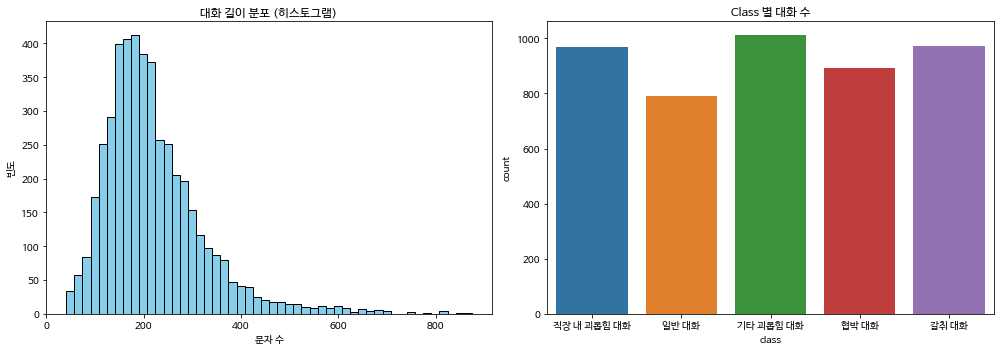

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

X_train = train_data['conversation']
y_train = train_data['class']
lengths = train_data['conversation'].apply(len)

print('X_train :',X_train.shape)
print('y_train :',y_train.shape)
#print('label 종류:', set(y_train))

# 시각화
plt.figure(figsize=(14, 5))

# 1. 히스토그램: 대화 길이
plt.subplot(1, 2, 1)
plt.hist(lengths, bins=50, color='skyblue', edgecolor='black')
plt.title("대화 길이 분포 (히스토그램)")
plt.xlabel("문자 수")
plt.ylabel("빈도")

# 2. Countplot: class 분포
plt.subplot(1, 2, 2)
sns.countplot(x=y_train)
plt.title("Class 별 대화 수")

plt.tight_layout()
plt.show()

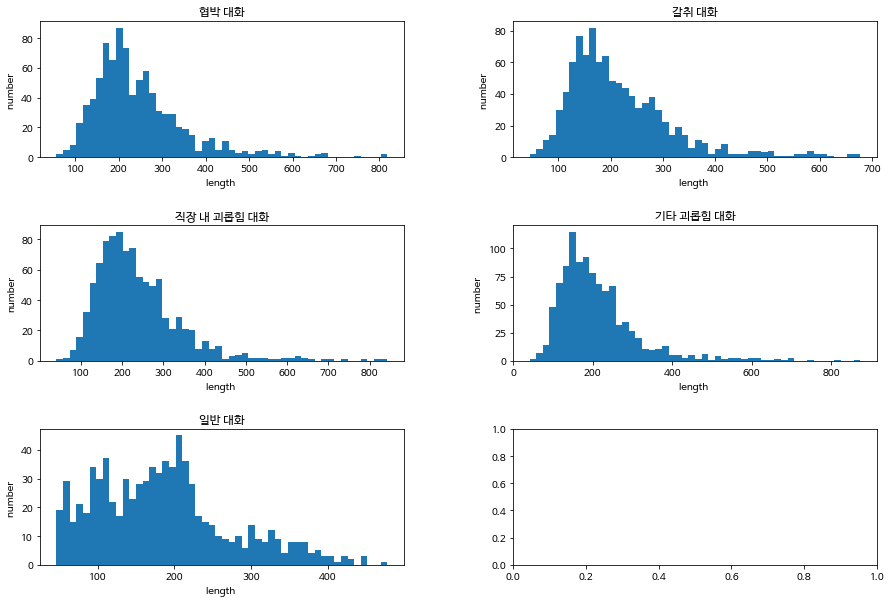

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # 2차원 → 1차원 배열로 변환

lengths1 = train_data['conversation'][train_data['class']=='협박 대화'].apply(len)
lengths2 = train_data['conversation'][train_data['class']=='갈취 대화'].apply(len)
lengths3 = train_data['conversation'][train_data['class']=='직장 내 괴롭힘 대화'].apply(len)
lengths4 = train_data['conversation'][train_data['class']=='기타 괴롭힘 대화'].apply(len)
lengths5 = train_data['conversation'][train_data['class']=='일반 대화'].apply(len)

axes[0].hist(lengths1, bins=50)
axes[0].set_xlabel('length ')
axes[0].set_ylabel('number ')
axes[0].set_title('협박 대화')

axes[1].hist(lengths2, bins=50)
axes[1].set_xlabel('length ')
axes[1].set_ylabel('number ')
axes[1].set_title('갈취 대화')

axes[2].hist(lengths3, bins=50)
axes[2].set_xlabel('length ')
axes[2].set_ylabel('number')
axes[2].set_title('직장 내 괴롭힘 대화')

axes[3].hist(lengths4, bins=50)
axes[3].set_xlabel('length ')
axes[3].set_ylabel('number ')
axes[3].set_title('기타 괴롭힘 대화')

axes[4].hist(lengths5, bins=50)
axes[4].set_xlabel('length ')
axes[4].set_ylabel('number ')
axes[4].set_title('일반 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

### 5. merged_train 데이타 csv 파일로 저장

- ../data/raw_csv/merged_train.csv

In [68]:
train_data.to_csv('../data/raw_csv/merged_train.csv', index=False, encoding='utf-8-sig')  # index=False는 인덱스를 저장하지 않도록 함

In [69]:
train_data_path ="../data/raw_csv/merged_train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,1951,직장 내 괴롭힘 대화,팀장님 이거 언제까지 마무리 하면 될까요?\n무리하지 말고 넉넉하게 주말까지 다 작...
1,4756,일반 대화,"내일 날씨 어떻대?\n비 온다던데. 우산 챙겨가야 할 것 같아.\n에이, 야외 활동..."
2,1234,기타 괴롭힘 대화,야 쟤 좀 봐.\n 꼴에 유행하는 옷 입었네 \n 호박에 줄 긋는다고 수박되나 \n...
3,4767,일반 대화,오늘 수업 내용 이해했어?\n솔직히 좀 어려웠어. 너는?\n나도 몇 부분이 헷갈리더...
4,1511,직장 내 괴롭힘 대화,자네 내일 아침에 우리집 들려서 출근하게\n네?\n내가 차가 고장났어\n아. 그런데...


In [70]:
train_data.shape

(4637, 3)